# Fetch from GenBank

In [8]:
from reprophylo import *

Download all available 12S sequences for a list of UK mammal taxa from Genbank.

The list of binomial species names was prepared in a simple text file: UK_Mammal_Species_List.txt.

In [2]:
!head ./UK_Mammal_Species_List.txt

Bos taurus
Capra hircus 
Ovis aries 
Capreolus capreolus
Cervus elaphus
Cervus nippon
Dama dama
Hydropotes inermis
Muntiacus reevesi
Rangifer tarandus


When performing genbank search, write the search result to a text file to easily identify species that have 0 records on genbank. For species where they are the only UK species in that genus and have no records, records from European sister species must be downloaded.

In [3]:
!fetch_from_db.py -t UK_Mammal_Species_List.txt -m 12S -o UK_mammal_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk > fetch_mammals_log.txt

In [4]:
!head fetch_mammals_log.txt


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)



Several UK species that were the sole species in a genus did not have records available on genbank e.g. *Eubalaena glacialis*, *Tadarida teniotis*

Sister species for these missing species were identified and will be included in the species list where possible to ensure full coverage for 12S in the reference database. The altered species list will be used to fetch sequences again from genbank.

NB: no need to create log file this time.

In [5]:
!fetch_from_db.py -t UK_EUsupp_Mammal_Species_List.txt -m 12S -o UK_EUsupp_mammal_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Apodemus flavicollis	6
#	Apodemus sylvaticus	6
#	Arvicola terrestris	2
#	Balaenoptera acutorostrata	6
#	Balaenoptera borealis	1
#	Balaenoptera musculus	3
#	Balaenoptera physalus	156
#	Barbastella barbastellus	1
#	Bos taurus	236
#	Canis lupus familiaris	1412
#	Capra hircus	198
#	Capreolus capreolus	39
#	Castor fiber	9
#	Cervus elaphus	43
#	Cervus nippon	34
#	Clethrionomys glareolus	42
#	Crocidura russula	4
#	Crocidura suaveolens	2
#	Cystophora cristata	3
#	Dama dama	13
#	Delphinapterus leucas	1
#	Delphinus delphis	2
#	Eptesicus fuscus	6
#	Eptesicus nilssonii	0
#	Eptesicus serotinus	4
#	Equus

Read reference sequences into ReproPhylo and filter to keep only proper 12S records.

In [6]:
list_loci_in_genbank('UK_EUsupp_mammal_12S_Genbank_raw.gb', # The input genbank file
                     'mammal_loci.csv',      # The loci file
                     'mammal_loci_counts.txt')

In [7]:
!cat mammal_loci_counts.txt

Could not find either gene or product in AB245427.2
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in V00711.1
Could not find either gene or product in AB099135.1
Could not find either gene or product in AB099149.1
Could not find either gene or product in AB099145.1
Could not find either gene or product in AB099139.1
Could not find either gene or product in AB098865.1
Could not find either gene or product 

In [8]:
!cat mammal_loci.csv

dna,rRNA,12S_ribosome_RNA,12S ribosome RNA
dna,rRNA,12SrRNA,12SrRNA
dna,rRNA,12_S_ribosomal_RNA,12 S ribosomal RNA
dna,rRNA,16S_ribosome_RNA,16S ribosome RNA
dna,rRNA,16SrRNA,16SrRNA
dna,rRNA,16_S_ribosomal_RNA,16 S ribosomal RNA
dna,CDS,ABHD15,ABHD15
dna,CDS,ALOX12,ALOX12
dna,CDS,APT6,APT6
dna,CDS,APT8,APT8
dna,CDS,ATP_synthase_F0_subunit_6,ATP synthase F0 subunit 6
dna,CDS,ATP_synthase_F0_subunit_8,ATP synthase F0 subunit 8
dna,CDS,ATPase,ATPase
dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,ATPase_subunit_8,ATPase subunit 8
dna,CDS,Alox12,Alox12
dna,CDS,Arachidonate_12-lipoxygenase__12S-type,Arachidonate 12-lipoxygenase_ 12S-type
dna,CDS,Atp6,Atp6
dna,CDS,Atp8,Atp8
dna,CDS,Beta-enolase,Beta-enolase
dna,CDS,C-X-C_motif_chemokine_16,C-X-C motif chemokine 16
dna,CDS,CO1,CO1
dna,CDS,CO2,CO2
dna,CDS,CO3,CO3
dna,CDS,COB,COB
dna,CDS,COX1I,COX1I
dna,CDS,COXI,COXI
dna,CDS,COXII,COXII
dna,CDS,COXIII,COXIII
dna,CDS,CTYB,CTYB
dna,CDS,CYB,CY

Extract all synonyms for '12S' and write to text file.

In [9]:
%%file mammal_target_locus.csv
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Overwriting mammal_target_locus.csv


In [10]:
!cat mammal_target_locus.csv

dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Now, repeat process and create outgroups that can be used for tree construction as reference points for all mammal sequences. *Xenopus laevis*, *Gallus gallus*, *Chelydra serpentina*, are ideal outgroups.

In [11]:
%%file outgroup.txt
Chelydra serpentina
Gallus gallus
Xenopus laevis

Overwriting outgroup.txt


In [12]:
!fetch_from_db.py -t ../fetch_clean_align_tree/outgroup.txt -m 12S -o outgroups -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Chelydra serpentina	8
#	Gallus gallus	271
#	Xenopus laevis	21

total number of accessions fetched: 300


downloading 300 records .. processing 1000 accessions per batch

[Mon Jan 23 2017 15:04:17]	batch: 0000001	300 unique records downloaded	-> outgroups.0000001.gb	(total: 300 (100.00 %); remaining: 0 -> DONE!)

Concatenate all files	-> outgroups.gb



In [13]:
list_loci_in_genbank('outgroups.gb', 'outgroup_list_of_loci.csv')

Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in M10188.1
Could not find either gene or product in M10188.1

There are 53 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------

In [14]:
!cat outgroup_list_of_loci.csv

dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,ATPase_subunit_8,ATPase subunit 8
dna,CDS,ERAL1,ERAL1
dna,CDS,MT-ATP6,ATP6
dna,CDS,MT-ATP8,ATP8,ATPase8
dna,CDS,MT-CO1,COI,COX1,cytochrome c oxidase subunit I
dna,CDS,MT-CO2,COII,COX2,cytochrome c oxidase subunit II
dna,CDS,MT-CO3,COIII,COX3,cytochrome c oxidase subunit III
dna,CDS,MT-CYB,cytb,Cytb,CYTB,cytochrome b
dna,CDS,MT-ND1,NADH dehydrogenase subunit 1,ND1
dna,CDS,MT-ND2,NADH dehydrogenase subunit 2,ND2
dna,CDS,MT-ND3,NADH dehydrogenase subunit 3,ND3
dna,CDS,MT-ND4,NADH dehydrogenase subunit 4,NADH dehydrogenase subunit IV,ND4
dna,CDS,MT-ND4L,NADH dehydrogenase subunit 4L,ND4L
dna,CDS,MT-ND5,NADH dehydrogenase subunit 5,ND5
dna,CDS,MT-ND6,NADH dehydrogenase subunit 6,ND6
dna,CDS,NADH_dehydrogenase_1,NADH dehydrogenase 1
dna,CDS,ORF_3,ORF 3
dna,CDS,cytochrome_oxidase_subunit_1,cytochrome oxidase subunit 1
dna,CDS,cytochrome_oxidase_subunit_2,cytochrome oxidase subunit 2
dna,CDS,c

As there are more than 40,000 12S rRNA records for human on genbank, downloading and processing all of these sequences would be extremely slow and inefficient. Instead a genbank file of 10 12S rRNA records for human has been prepared.

In [15]:
list_loci_in_genbank('human12S.gb', 'human_list_of_loci.csv')


There are 1 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
10 instances of rRNA,12S ribosomal RNA
-------------------------------
Gene and count sorted by counts
-------------------------------
10 instances of rRNA,12S ribosomal RNA


In [16]:
!cat human_list_of_loci.csv

dna,rRNA,rrnS,12S ribosomal RNA


# Reprophylo project

Start ReproPhylo project.

In [17]:
pj=Project('mammal_target_locus.csv', pickle='mam_raw.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [18]:
# pj=unpickle_pj('mam_raw.pkl', git=False)
# Use this code cell if running program more than once.

Read mammal sequences into ReproPhylo.

In [19]:
pj.read_embl_genbank(['UK_EUsupp_mammal_12S_Genbank_raw.gb', 'outgroups.gb', 'human12S.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [20]:
pj.extract_by_locus()

In [21]:
pj.species_vs_loci('mammal_species_vs_locus_raw.csv')

In [22]:
!cat mammal_species_vs_locus_raw.csv

In [23]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 5245
Number of species (see below for full list): 107
['Ovis aries', 'Hydropotes inermis', 'Rangifer tarandus', 'Phoca vitulina', 'Myotis lucifugus', 'Muscardinus avellanarius', 'Crocidura russula', 'Peponocephala electra', 'Myotis myotis', 'Dama dama', 'Pipistrellus kuhlii', 'Physeter catodon', 'Lasiurus cinereus', 'Sorex minutus', 'Myotis mystacinus', 'Cystophora cristata', 'Cervus nippon', 'Meles meles', 'Mustela nivalis', 'Tursiops truncatus', 'Microtus agrestis', 'Sciurus carolinensis', 'Globicephala melas', 'Apodemus flavicollis', 'Felis silvestris', 'Homo sapiens', 'Myodes glareolus', 'Rattus norvegicus', 'Macropus rufogriseus', 'Rattus rattus', 'Mesoplodon bidens', 'Myotis emarginatus', 'Xenopus laevis', 'Phocoena phocoena', 'Mustela erminea', 'Neomys fodiens', 'Monodon monoceros', 'Mus musculus', 'Sciurus vulgaris', 'Sus scrofa', 'Myocastor coypus', 'Martes martes', 'Pseudorca crassidens', 'Pusa hispida', 'Felis catus', 'Stenella coeruleoalba', 'Odoben

In [24]:
def crop_to_CDS(record):
    """The function crops a Genbank record to only retain the sequence of the first CDS"""
    
    from Bio import SeqFeature
    
    strands=[]
    r = record
    print "\nprocessing record: '%s' " %r.id,
    if r.features:
        for feature in r.features:
            if feature.type == 'CDS':
                strands.append(feature.location.strand)
                gene_name = feature.qualifiers['gene'][0]
                r.seq = r.seq[feature.location.start:feature.location.end]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                             1)
                break    
            elif feature.type == 'rRNA':
                strands.append(feature.location.strand)
                qualifiers = feature.qualifiers
                               
                if 'product' in qualifiers:
                    gene_name = feature.qualifiers['product'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)
                    break
                elif 'gene' in qualifiers:
                    gene_name = feature.qualifiers['gene'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)

                
        for feature in r.features:
            if feature.type == 'source':
                strands.append(feature.location.strand)
                feature.qualifiers['note'] = ['modified from original record: cropped to only CDS/rRNA '+str(gene_name)]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(len(r.seq)), 
                                                             feature.location.strand)
                break
                    
        if len(list(set(strands))) > 1:
            r.seq = r.seq.reverse_complement()
            print "\t.. reverse complementing",

        print "\t.. final length: %s" %len(r.seq),

    else:
        print "\t  no features found .."

    #print r.format('genbank')

In [25]:
for r in pj.records:
#    print r.format('genbank')
    crop_to_CDS(record=r)


processing record: 'JQ622003.1'  	.. final length: 716 
processing record: 'GU350295.1'  	.. final length: 466 
processing record: 'KU291085.1'  	.. final length: 954 
processing record: 'EF027260.1'  	.. final length: 144 
processing record: 'KU290437.1'  	.. final length: 954 
processing record: 'KU290841.1'  	.. final length: 954 
processing record: 'AY879381.1'  	.. final length: 467 
processing record: 'KR059155.1'  	.. final length: 569 
processing record: 'DQ480496.1'  	.. final length: 954 
processing record: 'AP013078.1'  	.. final length: 976 
processing record: 'AY879373.1'  	.. final length: 467 
processing record: 'AY879427.1'  	.. final length: 467 
processing record: 'KR059209.1'  	.. final length: 569 
processing record: 'NC_004028.1'  	.. final length: 956 
processing record: 'KC312611.1'  	.. final length: 969 
processing record: 'AY769440.1'  	.. final length: 957 
processing record: 'KU290645.1'  	.. final length: 954 
processing record: 'DQ480494.1'  	.. final len

Convert cleaned records to genbank and fasta format in order to perform vsearch and remove redundancy.

In [26]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    temp.append(r)

out = open('mammal_12S_raw_cleaned.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('mammal_12S_raw_cleaned.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 5245 records


Pickle the project.

In [27]:
pickle_pj(pj, 'mam_raw.pkl')

'mam_raw.pkl'

# Vsearch - remove redundancy

Remove redundancy by clustering the 12S rRNA sequences with vsearch.

In [28]:
!vsearch -threads 5 --cluster_fast mammal_12S_raw_cleaned.fa --strand both --uc 12S_id-1.uc --id 1 --query_cov 1

vsearch v1.1.0_linux_x86_64, 31.3GB RAM, 8 cores
https://github.com/torognes/vsearch

Reading file mammal_12S_raw_cleaned.fa 100%
4114571 nt in 5240 seqs, min 40, max 16220, avg 785
Indexing sequences 100%
Masking 100%
Sorting by length 100%
Counting unique k-mers 100%
Clustering 100%
Writing clusters 100%
Clusters: 1088 Size min 1, max 716, avg 4.8
Singletons: 707, 13.5% of seqs, 65.0% of clusters


In [29]:
pj = Project('mammal_target_locus.csv', pickle='mam_nr.pkl', git=False)

In [30]:
#pj = unpickle_pj('mam_nr.pkl', git=False)

In [31]:
pj.read_embl_genbank(['mammal_12S_raw_cleaned.gb'])

In [32]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


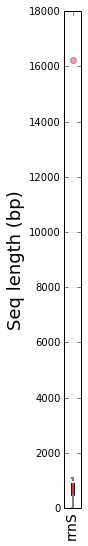

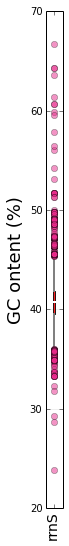

In [33]:
%matplotlib inline
pj.report_seq_stats()

In [34]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 5245
Number of species (see below for full list): 107
['Ovis aries', 'Hydropotes inermis', 'Rangifer tarandus', 'Phoca vitulina', 'Myotis lucifugus', 'Muscardinus avellanarius', 'Crocidura russula', 'Peponocephala electra', 'Myotis myotis', 'Dama dama', 'Pipistrellus kuhlii', 'Physeter catodon', 'Lasiurus cinereus', 'Sorex minutus', 'Myotis mystacinus', 'Cystophora cristata', 'Cervus nippon', 'Meles meles', 'Mustela nivalis', 'Tursiops truncatus', 'Microtus agrestis', 'Sciurus carolinensis', 'Globicephala melas', 'Apodemus flavicollis', 'Felis silvestris', 'Homo sapiens', 'Myodes glareolus', 'Rattus norvegicus', 'Macropus rufogriseus', 'Rattus rattus', 'Mesoplodon bidens', 'Myotis emarginatus', 'Xenopus laevis', 'Phocoena phocoena', 'Mustela erminea', 'Neomys fodiens', 'Monodon monoceros', 'Mus musculus', 'Sciurus vulgaris', 'Sus scrofa', 'Myocastor coypus', 'Martes martes', 'Pseudorca crassidens', 'Pusa hispida', 'Felis catus', 'Stenella coeruleoalba', 'Odoben

Extract ids of representative sequences identified by vsearch -> remove all others from the object.

In [35]:
ids = []

uc=open('12S_id-1.uc', 'r')

for line in uc:
    if line.startswith('C'):
        ids.append(line.split("\t")[8])
        
recs_to_keep = {'rrnS': ids}
recs_to_drop = {'rrnS': []}

for r in pj.records:
    if not r.id in recs_to_keep['rrnS']:
        recs_to_drop['rrnS'].append(r.id)
        
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 4157
to keep: 1088
TOTAL: 5245


Exclude redundant records from object.

In [36]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [37]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 1088
Number of species (see below for full list): 107
['Ovis aries', 'Hydropotes inermis', 'Phocoena phocoena', 'Phoca vitulina', 'Myotis lucifugus', 'Muscardinus avellanarius', 'Crocidura russula', 'Peponocephala electra', 'Myotis myotis', 'Dama dama', 'Pipistrellus kuhlii', 'Physeter catodon', 'Lasiurus cinereus', 'Sorex minutus', 'Myotis mystacinus', 'Crocidura suaveolens', 'Cystophora cristata', 'Cervus nippon', 'Meles meles', 'Mustela nivalis', 'Tursiops truncatus', 'Microtus agrestis', 'Sciurus carolinensis', 'Globicephala melas', 'Apodemus flavicollis', 'Felis silvestris', 'Homo sapiens', 'Myodes glareolus', 'Rattus norvegicus', 'Macropus rufogriseus', 'Rattus rattus', 'Mesoplodon bidens', 'Myotis emarginatus', 'Xenopus laevis', 'Rangifer tarandus', 'Mustela erminea', 'Neomys fodiens', 'Monodon monoceros', 'Mus musculus', 'Sciurus vulgaris', 'Lepus europaeus', 'Myocastor coypus', 'Martes martes', 'Pseudorca crassidens', 'Pusa hispida', 'Lagenorhynchus al

Write short 12S rRNA sequences (< 500bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [38]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 500:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('mammal_short_to_align.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 268


# Filter by Length

Write cropped records (minimum length of 500bp) to Genbank file.

In [39]:
from Bio import SeqIO

temp=[]
for r in pj.records_by_locus['rrnS']:
    if len(r.seq) >= 500:
        temp.append(r)

out = open('mammal12S_cropped_500bp.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('mammal12S_cropped_500bp.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 820 records


Pickle the project.

In [40]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

Now view records in cropped genbank file.

In [41]:
for index, record in enumerate(SeqIO.parse("mammal12S_cropped_500bp.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = AP013078.1_f0, length 976, with 0 features
index 1, ID = KC572710.1_f0, length 976, with 0 features
index 2, ID = KT901455.1_f0, length 973, with 0 features
index 3, ID = DQ207755.1_f0, length 962, with 0 features
index 4, ID = KT210199.1_f0, length 963, with 0 features
index 5, ID = KU290643.1_f0, length 954, with 0 features
index 6, ID = KU290731.1_f0, length 954, with 0 features
index 7, ID = KT985983.1_f0, length 643, with 0 features
index 8, ID = AP013098.1_f0, length 976, with 0 features
index 9, ID = AY337521.1_f0, length 572, with 0 features
index 10, ID = AY337539.1_f0, length 571, with 0 features
index 11, ID = KC993004.1_f0, length 967, with 0 features
index 12, ID = KT368731.1_f0, length 977, with 0 features
index 13, ID = EU789717.1_f0, length 954, with 0 features
index 14, ID = KT985981.1_f0, length 899, with 0 features
index 15, ID = KT757745.1_f0, length 976, with 0 features
index 16, ID = GU229281.1_f0, length 571, with 0 features
index 17, ID = M55541.1_

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 500bp within Reprophylo.

In [42]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [30,50]
}
len_inliers = {
    'rrnS': [500,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


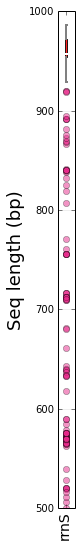

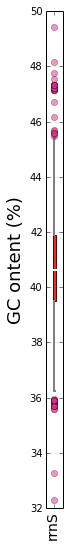

In [43]:
pj.report_seq_stats()

Pickle the project.

In [44]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

# Long Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 500bp. This will be done with the AlnConf class.

In [45]:
pj = unpickle_pj('mam_nr.pkl', git=False)

muscle default configuration:

In [46]:
muscle_default = AlnConf(pj,
                          method_name="muscleDefault",
                          program_name="muscle",
                          loci=['rrnS'])

muscle -in 129601485184645.25_rrnS.fasta


Once there are one or more AlnConf objects, they can be executed in one go using the Project method align. This method accepts a list of AlnConf objects and does whatever it is each of them tells it:

In [47]:
pj.align([muscle_default])

When the process is done, the AlnConf objects will be stored in pj.used_methods, which is a dictionary using the method names as keys. If you print one of these AlnConf objects as a string, you will get complete details about the process, including programme versions and references:

In [48]:
print pj.used_methods['muscleDefault']

AlnConf named muscleDefault with ID 129601485184645.25
Loci: rrnS 
Created on: Mon Jan 23 15:17:25 2017
Commands:
rrnS: muscle -in 129601485184645.25_rrnS.fasta

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
1178.74973202


Core Methods section sentence:
The dataset(s) rrnS were first ali

The alignment itself is stored in the pj.alignments dictionary, using keys that follow this pattern: locus_name@method_name where method_name is the name you have provided to your AlnConf object.

In [49]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (812 records of length 1468, IUPACProtein()) at 7fb1619efe50>}

Alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID.

In [50]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault_aln.fasta']

Pickle the project.

In [51]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

# Build tree

The alignment needs to be trimmed to remove large gaps in sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm. With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [52]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 432901485185836.83_rrnS@muscleDefault.fasta -gappyout


In [53]:
pj.trim([muscle_gappyout])

In [54]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 432901485185836.83
Alignments: rrnS@muscleDefault 
Created on: Mon Jan 23 15:37:16 2017
Commands:
rrnS@muscleDefault@gappyout: trimal -in 432901485185836.83_rrnS@muscleDefault.fasta -gappyout

Environment:Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
3.3399169445

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault were trimmed using the program trimAl 1.2rev59 [1].

Reference:
Salvador 

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [55]:
pj.trimmed_alignments

{'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (812 records of length 307, IUPACAmbiguousDNA()) at 7fb1605c11d0>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [56]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML. 

Configure RAxML for trimmed muscle alignment.

In [57]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 254741485185847.35_rrnS@muscleDefault@gappyout0 -p 765 -s 254741485185847.35_rrnS@muscleDefault@gappyout.fasta -T 5 -x 176 -N 100


In [58]:
pj.tree([raxml])

In [59]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 254741485185847.35
Alignments: rrnS@muscleDefault@gappyout 
Created on: Mon Jan 23 15:37:27 2017
Commands:
rrnS@muscleDefault@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 254741485185847.35_rrnS@muscleDefault@gappyout0 -p 765 -s 254741485185847.35_rrnS@muscleDefault@gappyout.fasta -T 5 -x 176 -N 100

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
3730.39590192

Core Methods section sentence:
Phy

Pickle the project.

In [60]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

# Visualise Tree

Now let's visualize the tree.

Prepare tree annotation:
- define outgroups
- specify support coloration

In [61]:
pj.add_qualifier_from_source('organism')

In [62]:
for species in ['Chelydra','Gallus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [63]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [64]:
pj.clear_tree_annotations()

pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-mammal-trimmed-500bp-raxml.html')

Check trees out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [65]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-mammals-trimmed-500bp-raxml.png

**===========================================================================================**

# Format long alignment and sequence IDs

In [66]:
from reprophylo import *

In [67]:
pj = unpickle_pj('mam_nr.pkl', git=False)

- Identify the record IDs of the sequences shorter than 500bp
- Write these sequences for to new fasta file (make sure the sequece IDs are as Reprophylo expects them: 'id_f0')
- Prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [68]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (812 records of length 1468, IUPACProtein()) at 7fb14e56ad10>}

In [69]:
from Bio import AlignIO

out=open('500bp_mammal_align.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [70]:
from Bio import SeqIO

records = list(SeqIO.parse("mammal_short_to_align.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 268


Check that record IDs are in format that reprophylo expects for alignment.

In [71]:
from Bio import SeqIO

short_seq = open("mammal_short_to_align.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

AY879429.1_f0
AY962041.1_f0
U12828.1_f0
KM224311.1_f0
AY879419.1_f0
EF056433.1_f0
KM224301.1_f0
HM026012.1_f0
KM224303.1_f0
U13090.1_f0
AB018586.1_f0
HM026016.1_f0
HM026014.1_f0
KM224300.1_f0
KT316285.1_f0
FJ688099.1_f0
EF056455.1_f0
JQ287753.1_f0
U13084.1_f0
DQ867007.1_f0
AY879380.1_f0
HM026002.1_f0
EF027257.1_f0
AY962024.1_f0
EF027255.1_f0
KF781310.1_f0
KM224294.1_f0
KM224302.1_f0
AY773084.1_f0
EF056406.1_f0
JN415745.1_f0
EF056432.1_f0
AY027817.1_f0
EF027265.1_f0
EF056418.1_f0
EF027261.1_f0
HQ529638.1_f0
D50287.1_f0
U13083.1_f0
JQ287752.1_f0
HG962386.1_f0
HM026017.1_f0
KT316284.1_f0
KT316286.1_f0
KX381616.1_f0
KM224296.1_f0
HM026003.1_f0
AB793742.1_f0
KJ192507.1_f0
U13086.1_f0
GU350285.1_f0
KM224298.1_f0
AJ000852.1_f0
AY962039.1_f0
AJ000847.1_f0
EF056393.1_f0
EF056448.1_f0
EF056453.1_f0
HQ529681.1_f0
HQ996541.1_f0
JN415728.1_f0
AF334509.1_f0
EF056425.1_f0
AY027826.1_f0
JN415740.1_f0
JQ287761.1_f0
AY027822.1_f0
HQ529674.1_f0
DQ852152.1_f0
AF334519.1_f0
HQ996530.1_f0
HQ529663.1_f0
HQ52

If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [72]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 500:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [73]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [74]:
for r in pj.records:
    if len(r.seq) < 500:
        print r.id
        print r.description

GU350295.1
Ovis aries isolate CI8 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
EF027260.1
Micromys minutus isolate 3 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY879381.1
Ovis aries isolate JTT91020 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY879373.1
Ovis aries isolate FS73 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY879427.1
Ovis aries isolate TSS29 control region, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY962035.1
Mustela putorius haplotype Mph14 cytochrome b (CYTB) gene, partial cds; tRNA-Thr and tRNA-Pro genes, D-loop, and tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
KM224297.1
Oryctolagus cun

Pickle the project.

In [75]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

# Feed short 12S rRNA sequences into long alignment

Previously, sequences shorter than 500bp were removed from the pj.records dictionary before a muscle alignment was performed. Short sequences can cause problems in global paired alignments when the alignment algorithm attempts to match them to much longer sequences.

Instead, we performed the long alignment of sequences longer than 500bp first and now we will attempt to incorporate the shorter sequences. This will be done using the hmmbuild command within the hmmer v3 program suite. to construct a Hidden Markov Model and produce a hmm file.

In [1]:
!hmmbuild -h #for help

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmbuild [-options] <hmmfile_out> <msafile>

Basic options:
  -h     : show brief help on version and usage
  -n <s> : name the HMM <s>
  -o <f> : direct summary output to file <f>, not stdout
  -O <f> : resave annotated, possibly modified MSA to file <f>

Options for selecting alphabet rather than guessing it:
  --amino : input alignment is protein sequence data
  --dna   : input alignment is DNA sequence data
  --rna   : input alignment is RNA sequence data

Alternative model construction strategies:
  --fast           : assign cols w/ >= symfrac residues as consensus  [default]
  --hand           : manual construction (requires reference annotation)
  --symfrac <x>    :

In [2]:
!hmmbuild 12S_mammal_ref.hmm 500bp_mammal_align.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             500bp_mammal_align.fasta
# output HMM file:                  12S_mammal_ref.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     500bp_mammal_align     812   307   307   449     2.00  0.449 

# CPU time: 0.16u 0.00s 00:00:00.16 Elapsed: 00:00:00.18


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [3]:
!hmmalign -h #for help

# hmmalign :: align sequences to a profile HMM
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmalign [-options] <hmmfile> <seqfile>

Basic options:
  -h     : show brief help on version and usage
  -o <f> : output alignment to file <f>, not stdout

Less common options:
  --mapali <f>    : include alignment in file <f> (same ali that HMM came from)
  --trim          : trim terminal tails of nonaligned residues from alignment
  --amino         : assert <seqfile>, <hmmfile> both protein: no autodetection
  --dna           : assert <seqfile>, <hmmfile> both DNA: no autodetection
  --rna           : assert <seqfile>, <hmmfile> both RNA: no autodetection
  --informat <s>  : assert <seqfile> is in format <s>: no autodetection
  --outformat <s> : output alignment in format <s>  [Stockholm]

Seque

In [4]:
%%bash

hmmalign -o 12S_mammal500bpref_plus_short_query.sto \
--mapali 500bp_mammal_align.fasta \
12S_mammal_ref.hmm mammal_short_to_align.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [5]:
from Bio import AlignIO

input_file = open("12S_mammal500bpref_plus_short_query.sto", "rU")
output_file = open("12S_MammalAlign_ALL.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 1080 records


# Tree Building

In [ ]:
from reprophylo import *

The fasta file containing the 12S rRNA mammal sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [9]:
pj=unpickle_pj('mam_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [10]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_mammal500bpref_plus_short_query.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

M10217.1_f0 is 1197bp
Y10943.1_f0 is 1197bp
M27605.1_f0 is 1197bp
AY581639.1_f0 is 1197bp
AY581648.1_f0 is 1197bp
AY581644.1_f0 is 1197bp
AY581640.1_f0 is 1197bp
AY581638.1_f0 is 1197bp
EF122793.1_f0 is 1197bp
JN860636.1_f0 is 1197bp
KF471517.1_f0 is 1197bp
EF373884.1_f0 is 1197bp
EF373885.1_f0 is 1197bp
EF373883.1_f0 is 1197bp
KP211422.1_f0 is 1197bp
EF373899.1_f0 is 1197bp
AP003321.1_f0 is 1197bp
FJ610338.1_f0 is 1197bp
FJ610339.1_f0 is 1197bp
KX512321.1_f0 is 1197bp
EF373904.1_f0 is 1197bp
KM886936.1_f0 is 1197bp
AY235570.1_f0 is 1197bp
GU261698.1_f0 is 1197bp
GU261674.1_f0 is 1197bp
AP003317.1_f0 is 1197bp
GU261680.1_f0 is 1197bp
GU261678.1_f0 is 1197bp
GU261693.1_f0 is 1197bp
AB086102.1_f0 is 1197bp
GU261683.1_f0 is 1197bp
KT626848.1_f0 is 1197bp
KP211419.1_f0 is 1197bp
GU261707.1_f0 is 1197bp
GU261694.1_f0 is 1197bp
AP003318.1_f0 is 1197bp
KR180302.1_f0 is 1197bp
KF783166.1_f0 is 1197bp
KF783165.1_f0 is 1197bp
NC_002080.2_f0 is 1197bp
AY245607.1_f0 is 1197bp
KJ868122.1_f0 is 1197

In [11]:
pj.alignments['rrnS@mammal_align_allseq'] = aln

In [12]:
pj.alignments

{'rrnS@mammal_align_allseq': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1080 records of length 1197, DNAAlphabet()) at 7f493a291c10>,
 'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (812 records of length 1468, IUPACProtein()) at 7f49395f6b50>}

In [13]:
pj.alignments.keys()

['rrnS@mammal_align_allseq', 'rrnS@muscleDefault']

The alignment needs trimming and removal of gaps within sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm.

With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [14]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@mammal_align_allseq'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 380491485190485.33_rrnS@mammal_align_allseq.fasta -gappyout


In [15]:
pj.trim([gappyout])

In [16]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 380491485190485.33
Alignments: rrnS@mammal_align_allseq 
Created on: Mon Jan 23 16:54:45 2017
Commands:
rrnS@mammal_align_allseq@gappyout: trimal -in 380491485190485.33_rrnS@mammal_align_allseq.fasta -gappyout

Environment:Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
5.17031502724

Core Methods section sentence:
The alignment(s) rrnS@mammal_align_allseq were trimmed using the program trimAl 1.2rev59 [

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [17]:
pj.trimmed_alignments

{'rrnS@mammal_align_allseq@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1080 records of length 307, IUPACAmbiguousDNA()) at 7f493c6fded0>,
 'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (812 records of length 307, IUPACAmbiguousDNA()) at 7f493e029710>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [18]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta',
 'rrnS@mammal_align_allseq@gappyout_trimmed_aln.fasta']

Write clipped alignment to file for downstream taxonomic curation using SATIVA.

In [19]:
from Bio import AlignIO

clipped_aln = pj.trimmed_alignments["rrnS@mammal_align_allseq@gappyout"]

In [20]:
out=open('trimmed_mammal_align_ALL.phy', 'w')
AlignIO.write(clipped_aln, out, 'phylip-relaxed')
out.close()

SATIVA requires a taxonomic file that has been generated from a genbank file containing all record IDs included in the trimmed alignment.

First, the alignment must be parsed in fasta format and record IDs altered to contain only the ID as entered on genbank e.g. EU116957.1

Next, the record IDs must be extracted from the trimmed alignment file.

In [21]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

input_file = AlignIO.read(open("rrnS@mammal_align_allseq@gappyout_trimmed_aln.fasta"), "fasta")#, alphabet=generic_dna)

to_keep = []

for r in input_file:
    record_id = "_".join(r.id.split("_")[:-1])
    print record_id
    to_keep.append(record_id)

M10217.1
Y10943.1
M27605.1
AY581639.1
AY581648.1
AY581644.1
AY581640.1
AY581638.1
EF122793.1
JN860636.1
KF471517.1
EF373884.1
EF373885.1
EF373883.1
KP211422.1
EF373899.1
AP003321.1
FJ610338.1
FJ610339.1
KX512321.1
EF373904.1
KM886936.1
AY235570.1
GU261698.1
GU261674.1
AP003317.1
GU261680.1
GU261678.1
GU261693.1
AB086102.1
GU261683.1
KT626848.1
KP211419.1
GU261707.1
GU261694.1
AP003318.1
KR180302.1
KF783166.1
KF783165.1
NC_002080.2
AY245607.1
KJ868122.1
JN003394.1
KF661093.1
FR691688.1
AJ389542.1
FR691686.1
FR691685.1
KM892835.1
AJ005781.1
AJ250356.1
KM892825.1
KM892840.1
KM892817.1
KM892812.1
KM892809.1
KM892834.1
KM892838.1
KM892839.1
KM892813.1
KM892836.1
KM892828.1
KM892815.1
KM892814.1
KM892826.1
KM892827.1
KM892821.1
KM892830.1
KF918859.1
KM892837.1
KM892820.1
KM892810.1
KM892823.1
KM892833.1
KM892832.1
KM892811.1
KM892818.1
KM892822.1
AJ311139.1
KP399599.1
AJ311127.1
AJ311164.1
AJ311131.1
AJ311126.1
AY533105.1
KF781663.1
KF781660.1
KF781661.1
KF781662.1
AY057792.1
AY012114.1
JX94

You must create an empty list in which the record IDs in pj.records that match the record IDs from the trimmed alignment can be stored and then written out in a reduced genbank file.

In [22]:
out_gb = []

for r in pj.records:
    if r.id in to_keep:
        out_gb.append(r)

for r in out_gb:
    print r.id
    
out = open("12S_preSATIVA_mammals.gb", "w")
SeqIO.write(out_gb, out, "genbank")
out.close()

AP013078.1
AY879429.1
AY962041.1
KC572710.1
U12828.1
KT901455.1
DQ207755.1
KM224311.1
KT210199.1
KU290643.1
KU290731.1
AY879419.1
KT985983.1
AP013098.1
EF056433.1
AY337521.1
AY337539.1
KC993004.1
KT368731.1
EU789717.1
KT757745.1
GU229281.1
M55541.1
AY337535.1
KM892823.1
KT368739.1
KM892838.1
HQ439467.1
KM892837.1
AY337523.1
KM892812.1
AY337526.1
KM224301.1
AJ005780.1
HM026012.1
KM224303.1
KJ530565.1
U13090.1
AP013080.1
AB018586.1
HM026016.1
HM026014.1
KC776706.1
KM224300.1
KU290798.1
KT316285.1
FJ688099.1
JN389443.1
KC493610.1
HE577847.1
AY337527.1
GU229280.1
EF056455.1
KP942529.1
AY584828.1
AF527537.1
HM236183.1
KC572832.1
HM106319.1
KR180300.1
AY292702.1
JQ287753.1
AJ554062.1
JX945964.1
DQ534707.2
KF938325.1
NC_002391.1
KU291066.1
KP981378.1
AB119077.1
U13084.1
KU290680.1
AY729880.1
KF661083.1
KF661093.1
AF326089.1
DQ867007.1
AY879380.1
AB245427.2
KU290402.1
FJ817358.1
HM026002.1
EF027257.1
KR059146.1
AY962024.1
EF027255.1
AY676863.1
AY337529.1
FJ817364.1
KT601198.1
EF545567.1
KP9425

How to run SATIVA is described in a different notebook. It may be a good strategy to set this going now in a separate notebook. Then continue onwards in this notebook.

**===============================================================================================**

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [23]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@mammal_align_allseq@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 783231485191214.2_rrnS@mammal_align_allseq@gappyout0 -p 106 -s 783231485191214.2_rrnS@mammal_align_allseq@gappyout.fasta -T 5 -x 206 -N 100


In [24]:
pj.tree([raxml])

In [25]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 783231485191214.2
Alignments: rrnS@mammal_align_allseq@gappyout 
Created on: Mon Jan 23 17:06:54 2017
Commands:
rrnS@mammal_align_allseq@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 783231485191214.2_rrnS@mammal_align_allseq@gappyout0 -p 106 -s 783231485191214.2_rrnS@mammal_align_allseq@gappyout.fasta -T 5 -x 206 -N 100

Environment:
Platform: Linux-4.4.0-45-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
7027.71617198

Core Methods 

In [26]:
pj.trees.keys()

['rrnS@muscleDefault@gappyout@raxml-muscleDefault-trimmed',
 'rrnS@mammal_align_allseq@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [27]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'

# Visualise tree

Now let's visualize the tree.

Prepare tree annotation:
 - define outgroups
 - specify support coloration

In [28]:
pj.add_qualifier_from_source('organism')

In [29]:
for species in ['Chelydra','Gallus','Xenopus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [30]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [31]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-mammal-all-raxml.html')

Check tree out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [32]:
%%bash

last_png=$(ls -hlrt *rrnS@mammal_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-mammal-all-raxml.png

**=========================================================================================**

In the meantime we have run SATIVA on the alignment that was the basis of the above tree.

Now we are going to highlight the records that SATIVA considers mislabelled in the tree. We are also going to add a heatmap to the tree illustrating the confidence that SATIVA has in a given call.

Parse SATIVA output and record putatively mislabelled sequence records and the confidence of the call.

In [33]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]

Add two new qualifiers containing info about he SATIVA results to the sequence features.

In [34]:
for r in pj.records:
    if r.id in rec_mislabelled:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['yes']
            f.qualifiers['mislabeled_conf'] = [rec_mislabelled[r.id]]
    else:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['no']
            f.qualifiers['mislabeled_conf'] = [0.0001]

In [35]:
pj.propagate_metadata()

Prepare tree annotation:

- color records that were identified by SATIVA as being mislabelled.
- add heatmap with mislabel confidence

In [36]:
leaf_colors = {'yes':'red', 'no': 'black'}
bg_colors = {'yes':'red', 'no': 'white'}

In [37]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-mammal-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            leaf_node_color_meta = 'mislabeled', leaf_label_colors = leaf_colors)

In [38]:
%%bash

last_png=$(ls -hlrt *rrnS@mammal_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png 12S_muscleDefault_trimmed_mammal_all_raxml_SATIVA_leaf_colored.png

In [39]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-mammal-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            node_bg_meta = 'mislabeled', node_bg_color = bg_colors)

In [40]:
%%bash

target=12S_muscleDefault_trimmed_mammal_all_SATIVA_bg_colored.png

last_png=$(ls -hlrt *rrnS@mammal_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png $target

In [41]:
pickle_pj(pj, 'mam_nr.pkl')

'mam_nr.pkl'